In [50]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [9]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


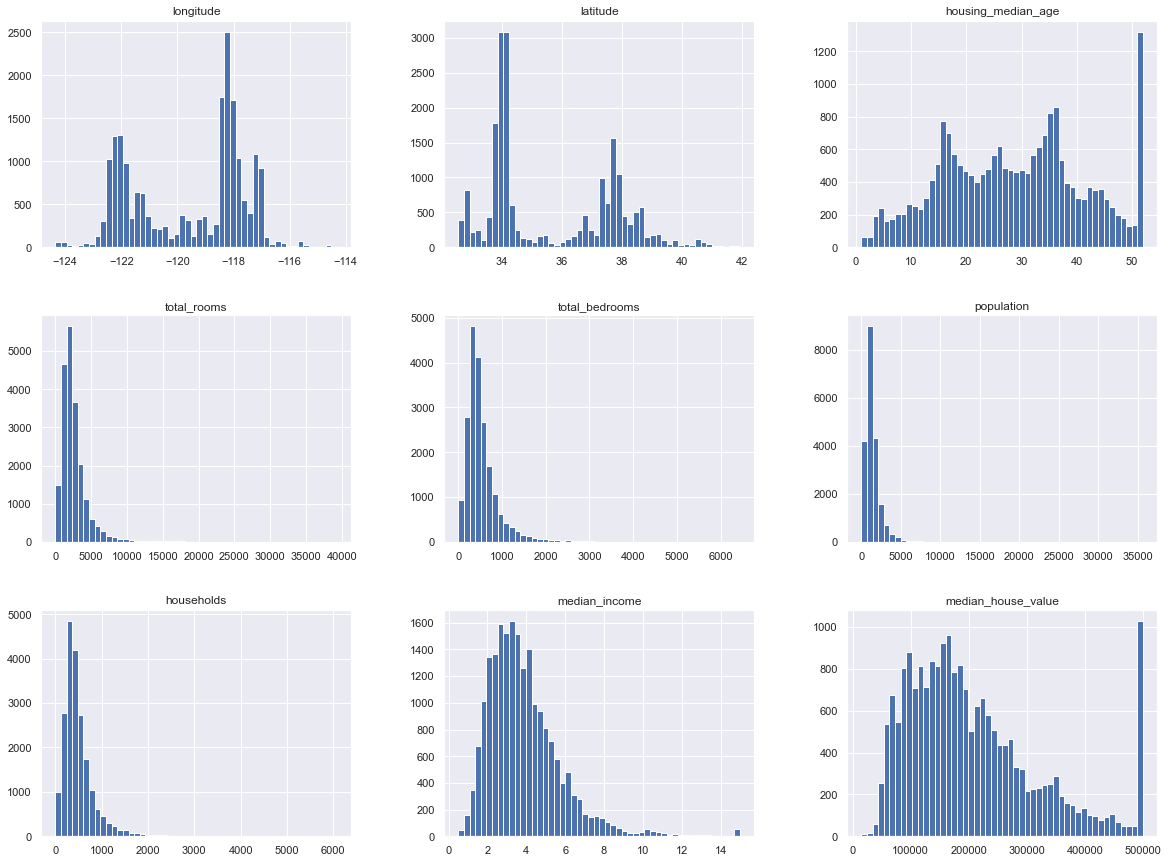

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Creating test & train sets

In [13]:
from zlib import crc32

# this function is used to have the same dataSet split over multiple runs, it uses rows index 
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# now data set is being splitted
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [14]:
df = df.reset_index()
train_set, test_set = split_train_test_by_id(df, 0.2, "index")

# sklearn splitting function could also be used :
from sklearn.model_selection import train_test_split
#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

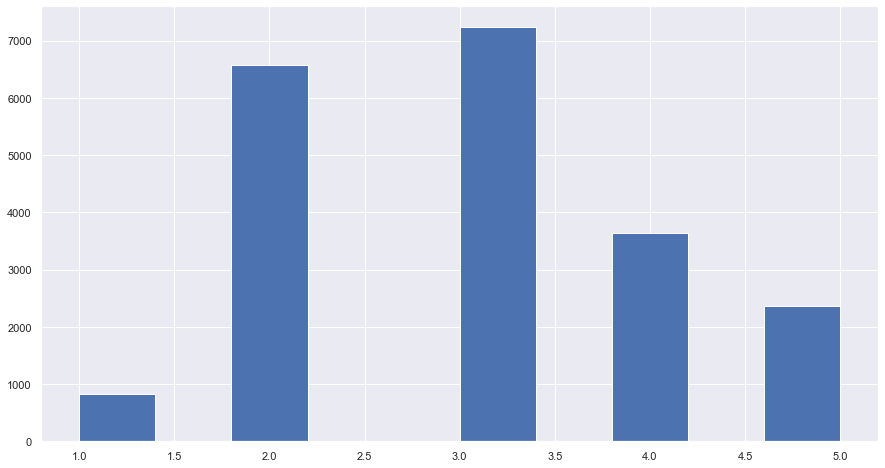

In [159]:
# create median_income categories
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],  labels=[1, 2, 3, 4, 5])
df["income_cat"].hist()
plt.show()

In [158]:
# StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=47 )
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [32]:
"""
test set generated using stratified sampling has
income category proportions almost identical to those in the full dataset, whereas the
test set generated using purely random sampling is quite skewed
"""
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [33]:
df["income_cat"].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [34]:
# remove remove the income_cat attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
# We spent quite a bit of time on test set generation for a good reason: this is an often
# neglected but critical part of a Machine Learning project. Moreover, many of these
# ideas will be useful later when we discuss cross-validation. Now it’s time to move on
# to the next stage: exploring the data.

## Discover and Visualize the Data to Gain Insights

So far you have only taken a quick glance at the data to get a general understanding of the kind of data you are manipulating. Now the goal is to go a little bit more in depth.
First, make sure you have put the test set aside and you are only exploring the training set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. In our case, the set is quite small so you can just work directly on the full set. Let’s create a copy so you can play with it without harming the training set:


In [35]:
housing = strat_train_set.copy()

### Visualizing Geographical Data (latitude and longitude)


[]

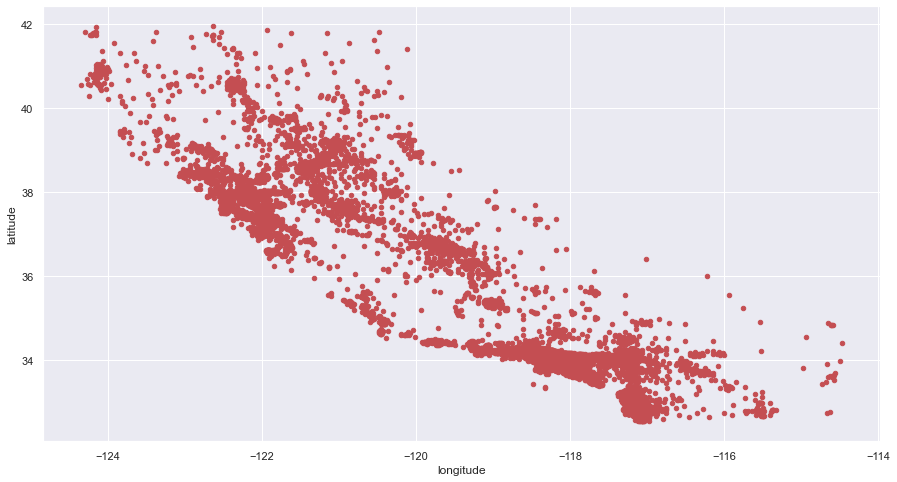

In [44]:
housing.plot(kind="scatter", x="longitude", y="latitude", color="r", alpha=1) # alpha param to visualize easily the places where there is a high density of data points=> 0.1
plt.plot()

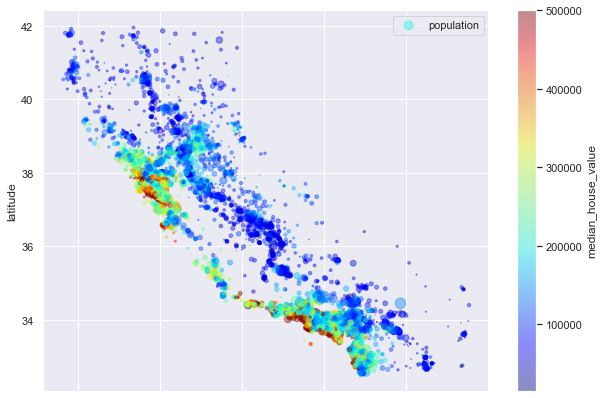

In [47]:
# The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We
# will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices):
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.show()

## Looking for correlations

> Since the dataset is not too large, you can easily compute the standard correlation
coecient

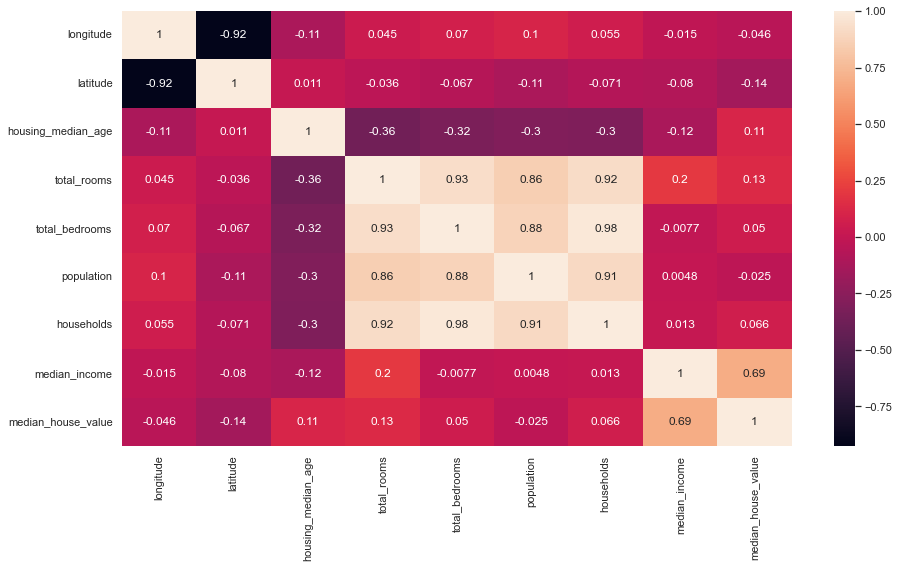

In [71]:
corr_mat = df.corr()

# remove index since it has nothing to do with correlation
del corr_mat['index']
corr_mat = corr_mat.drop(index='index')

sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(corr_mat, annot=True)
plt.show() 

In [72]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685020
total_rooms           0.134084
housing_median_age    0.098698
index                 0.074757
households            0.065762
total_bedrooms        0.049418
population           -0.025208
longitude            -0.040254
latitude             -0.150659
Name: median_house_value, dtype: float64

> various plots along with the correlation coefficient between their horizontal and vertical axes

<img src="correlation-plot.png" >

* 

Another way to check for correlation between attributes, which plots every numerical attribute against every other numerical attribute.

> open the image in a new tab to see it clearly

The main diagonal (top left to bottom right) would be full of straight lines if Pandas plotted each variable against itself, which would not be very useful. So instead Pandas displays a histogram of each attribute

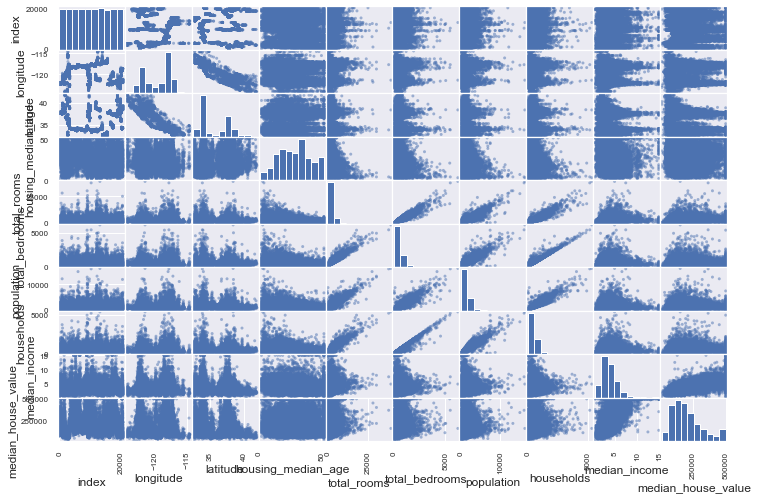

In [73]:
scatter_matrix(housing[ housing.columns], figsize=(12, 8))
plt.show()

> The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot

see next plotting :
* correlation is very strong between the two attributes
* the price cap that we noticed earlier is clearly visible as a horizontal line at $500,000 & also other lines at 450k 350k 
* You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks

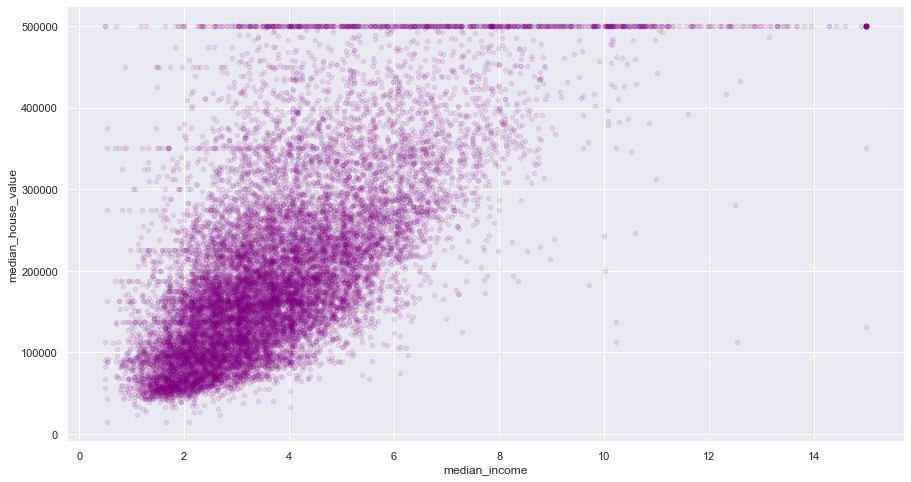

In [76]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, color="purple")
plt.show()

<br>

### Experimenting with Attribute Combinations


In [77]:
# Creating new attributes
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [79]:
# take another look on correlation
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.685020
rooms_per_household         0.147356
total_rooms                 0.134084
housing_median_age          0.098698
index                       0.074757
households                  0.065762
total_bedrooms              0.049418
population_per_household   -0.022267
population                 -0.025208
longitude                  -0.040254
latitude                   -0.150659
bedrooms_per_room          -0.253801
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms

In [161]:
# revert changes on DFs
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

1436     194000.0
2790     116100.0
19962    129200.0
8261     310000.0
16058    332700.0
           ...   
5614     150400.0
15250    244700.0
12563     92700.0
12540    209800.0
1603     394400.0
Name: median_house_value, Length: 16512, dtype: float64

### Data Cleaning

You have three options for missing data :
* Get rid of the corresponding districts.
* Get rid of the whole attribute.
* Set the values to some value (zero, the mean, the median, etc.). `you should compute the median value on the training set, and
use it to fill the missing values in the training set, but also don’t forget to save the
median value that you have computed. You will need it later to replace missing values
in the test set when you want to evaluate your system, and also once the system goes
live to replace missing values in new data.`

> scikitLearn has a better solution to take care of missing values => SimpleImputer 

In [88]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # fillign missing values with median

housing_num = housing.drop("ocean_proximity", axis=1) # SimpleImputer works only with numerical values; dropping others
imputer.fit(housing_num)

print( imputer.statistics_ )  # stored medians of all attributes
print( "\n", housing_num.median().values)

[ 1.03185e+04 -1.18490e+02  3.42600e+01  2.90000e+01  2.13100e+03
  4.36000e+02  1.16800e+03  4.10000e+02  3.53600e+00]

 [ 1.03185e+04 -1.18490e+02  3.42600e+01  2.90000e+01  2.13100e+03
  4.36000e+02  1.16800e+03  4.10000e+02  3.53600e+00]


In [89]:
# replacing missing values by the learned medians 
X = imputer.transform(housing_num)
# transforming the result to a pd.DataFrame from a plain np.array
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

<br>

### Handling Text and Categorical Attributes

In [92]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(5)

,ocean_proximity
1436,NEAR BAY
2790,INLAND
19962,INLAND
8261,NEAR OCEAN
16058,NEAR BAY


In [94]:
# trnsforme these values into numerical ones

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [1.],
       [1.],
       [4.],
       [3.],
       [1.],
       [1.],
       [4.],
       [1.],
       [1.]])

In [95]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

> One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1).

>  To fix this issue, a common solution is
to create one binary attribute per category: one attribute equal to 1 when the category
is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is
“INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because
only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new
attributes are sometimes called dummy attributes. Scikit-Learn provides a OneHotEn
coder class to convert categorical values into one-hot vecto

In [100]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray() # 5 binary attributes for each housing_cat's row
# cat_encoder.categories_ # get encoder categories

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

<br>

## Custom Transformers

In [107]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs.shape

(16512, 12)

<br>

## Feature scaling (fr: normalisation)

not always required, has 2 types : 

* min-max (0 to 1 values) : scikit MinMaxScaler : (x- min)/(max-min)
* scaling and standardization : scikit StandardScaler :  ( x-mean) / stdDev => not appropriat when working with ANN

it is important to fit the scalers to the training data only, then scale other sets (test, new ..)

<br>

## Transformation Pipelines

data transformation steps that need to be executed in the right order.  Scikit-Learn provides the Pipeline class to help with such sequences of transformations. 

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([ # => name/estimator
    ('imputer', SimpleImputer(strategy="median")), # fill missing data
    ('attribs_adder', CombinedAttributesAdder()), # combine & create new features
    ('std_scaler', StandardScaler()), # scale data
]) # all but last have to be transformers
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.49125506, -1.22143732,  1.1008759 , ..., -0.0812012 ,
        -0.05352927, -0.23447865],
       [-1.26374322,  0.58259825,  0.81042322, ..., -0.09079817,
         0.46010604, -0.22598923],
       [ 1.62165807,  0.13783602,  0.22951784, ..., -0.02970699,
        -0.19346171, -0.27571299],
       ...,
       [ 0.37840835, -0.93159227,  1.36322027, ...,  0.04063249,
         0.19612175, -0.28428703],
       [ 0.37454367, -0.96657357,  1.36790499, ...,  0.09271053,
         0.26389415, -0.27198138],
       [-1.46319415, -1.28640259,  1.0540287 , ..., -0.21501195,
        -0.08189066,  0.09653749]])

In [117]:
# Another pipeline that will apply appropriate numerical/categorical transformations on DataFrame Columns
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num) # list of numerical cols
cat_attribs = ["ocean_proximity"] # list of categorical cols
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), # apply the first pipeline on numerical data
    ("cat", OneHotEncoder(), cat_attribs), # apply categorical pipelines on categorical data
])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.49125506, -1.22143732,  1.1008759 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.26374322,  0.58259825,  0.81042322, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.62165807,  0.13783602,  0.22951784, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.37840835, -0.93159227,  1.36322027, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37454367, -0.96657357,  1.36790499, ...,  0.        ,
         0.        ,  0.        ],
       [-1.46319415, -1.28640259,  1.0540287 , ...,  0.        ,
         1.        ,  0.        ]])

<br> <br>

# Select and Train a Model

## Training and Evaluating on the Training Set


In [124]:

# first model 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [125]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))
#  non accurate results

Predictions: [232070.80266127  55069.63086637  99266.27181176 367934.90732643
 272585.32422649]
Labels: [194000.0, 116100.0, 129200.0, 310000.0, 332700.0]


In [126]:
# Measuring the RMSE ON the whole trainning set
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67941.51601449864

> The model is still have a big error margin, This is an example of a model underfitting the training data, When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. As we saw in the previous chapter, the main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. This model is not regularized, so this rules out the last option. You could try to add more features (e.g., the log of the population), but first let’s try a more complex model to see how it does.

In [128]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

> the model is not perfect, it is just overfitted the data. We're not going to touch test_set until we're sure and confident about our model, now we need to validate this model using a validation subset of the training set 

<br>

### Better Evaluation Using Cross-Validation


In [131]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,  scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) # Scikit-Learn’s cross-validation features expect a utility function rather than a cost function

# Let’s look at the results of cross validation on 10 folds

def display_scores(scores):
    print("Scores:", scores)
    print("scores Mean:", scores.mean())
    print("scores  Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70526.42841085 67686.67482739 68498.61765758 66136.8320219
 71593.26547392 70393.83888381 74346.63512144 67337.76172588
 70794.03388254 70147.79743398]
scores Mean: 69746.18854392788
scores  Standard deviation: 2269.1253991532576


In [132]:
# Calculating the same metrics for simple linear mmodel with cross validation :
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [64779.1020805  68679.50137728 69816.03124546 68809.85548075
 66719.53366252 69059.64586969 70708.08956849 69108.77405013
 66556.14895726 67800.16905076]
scores Mean: 68203.6851342832
scores  Standard deviation: 1668.0849868064827



> That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

> Let's try RandomForestRegressor model 


In [137]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(tree_mse)
print("rmse : ", forest_rmse)

lin_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-lin_scores)
display_scores(forest_rmse_scores)

rmse :  18381.769403612056
Scores: [47755.30044072 49869.08522356 48887.54120124 49440.05350746
 49029.54440948 48296.97289245 53210.43367696 47457.02500894
 47451.36059126 49623.5346328 ]
scores Mean: 49102.08515848734
scores  Standard deviation: 1606.1565741700008


> as you can see, error now is pretty less than the one before. note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.


## Fine-Tune Your Model
Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them. Let’s look at a few ways you can do that.

### Grid Search
One way to do that would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.

In [140]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


{'max_features': 6, 'n_estimators': 30}

In [141]:
grid_search.best_params_ # best params

{'max_features': 6, 'n_estimators': 30}

In [142]:
grid_search.best_estimator_ # best estimator
 

RandomForestRegressor(max_features=6, n_estimators=30)

In [143]:
# of course you can also get results : 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64045.624464044646 {'max_features': 2, 'n_estimators': 3}
53612.58091946032 {'max_features': 2, 'n_estimators': 10}
50997.267158446164 {'max_features': 2, 'n_estimators': 30}
58525.82261926797 {'max_features': 4, 'n_estimators': 3}
50250.13348267823 {'max_features': 4, 'n_estimators': 10}
48096.96268824387 {'max_features': 4, 'n_estimators': 30}
55405.29437776105 {'max_features': 6, 'n_estimators': 3}
50080.413994987655 {'max_features': 6, 'n_estimators': 10}
47625.33148103753 {'max_features': 6, 'n_estimators': 30}
56379.517369434165 {'max_features': 8, 'n_estimators': 3}
50175.747932431696 {'max_features': 8, 'n_estimators': 10}
48046.72857703167 {'max_features': 8, 'n_estimators': 30}
60641.33426676235 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
52714.373151387466 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58210.90087340817 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
50452.42156879256 {'bootstrap': False, 'max_features': 3, 'n_estimator

> as you can see the  lowest rmse obtained now is ; 47625.33 that is better than latest one -> Congratulations, you have successfully fine-tuned your best model!


<br>

## Evaluate Your System on the Test Set


In [146]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2

print('best model: ', final_model)
print('final_mse :', final_mse)
print('final_rmse :', final_rmse)

best model:  RandomForestRegressor(max_features=6, n_estimators=30)
final_mse : 2315155583.187816
final_rmse : 48116.06367095937


In [156]:
# Compute a 95% confidence interval for the generalization error using scipy.stats.t.interval()

from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))


array([45827.46502972, 50300.64229536])

> The performance will usually be slightly worse than what you measured using crossvalidation if you did a lot of hyperparameter tuning (because your system ends up fine-tuned to perform well on the validation data, and will likely not perform as well on unknown datasets).

<br>

## Launch, Monitor, and Maintain Your System

You need to get your solution ready for produc‐tion, in particular by : 

* plugging the production input data sources into your system and writing tests.

* write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops (sudden breakage, but also performance degradation) This is quite common because models tend to “rot” as data evolves over time, unless the models are regularly trained on fresh data.

* Human evalua‐tion pipeline is always needed into your system.

*